In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

%pip install shap
%pip install catboost
import shap
import catboost
from catboost import CatBoostClassifier, Pool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 11.2 MB/s eta 0:00:00


# SHAP on Vulnerability (NVD/SARD) Datasets

Size of Dataset (22154, 67)
Accuracy:84.715720 %



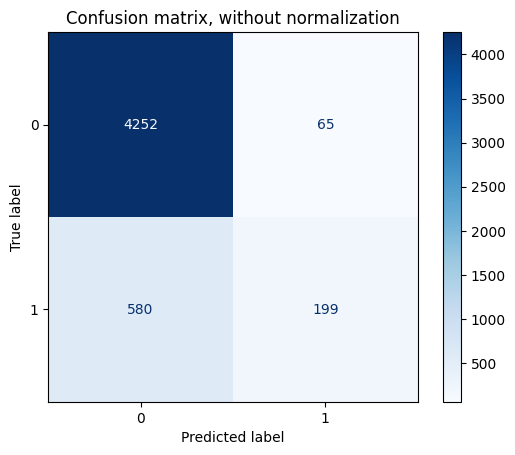

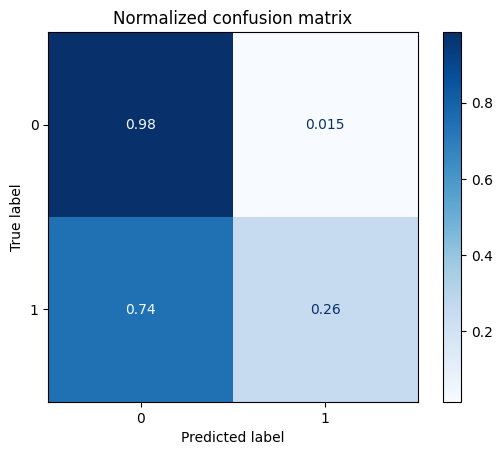

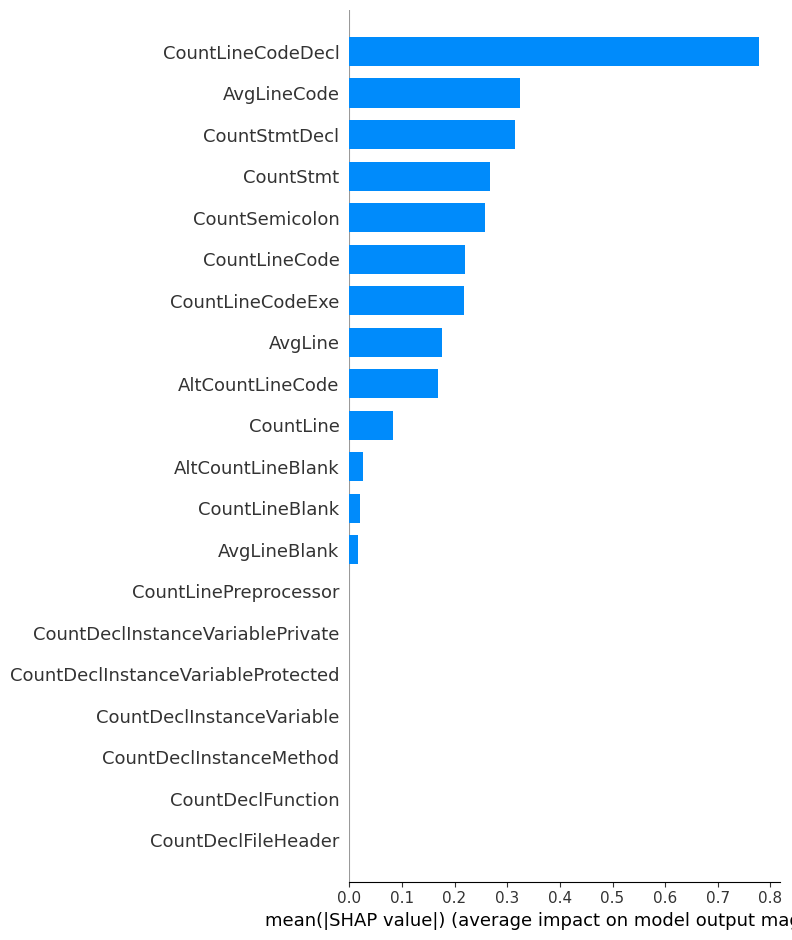

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


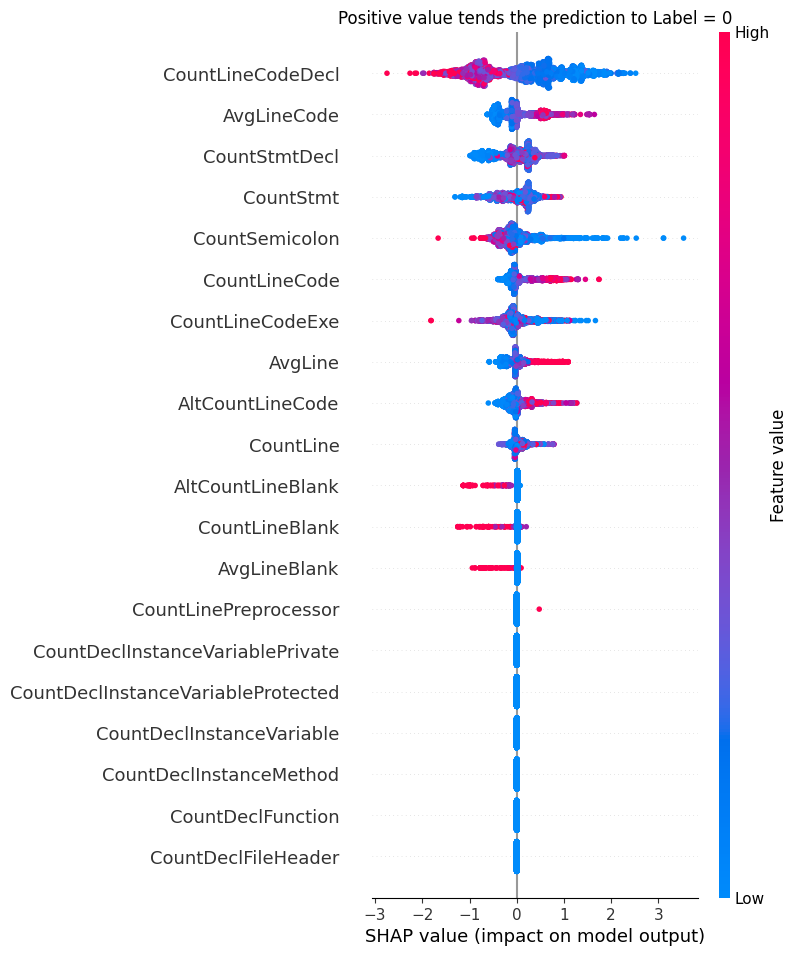

In [40]:
df = pd.read_csv('api_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':100, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot

shap_values_new = [-shap_values,shap_values]

shap.summary_plot(shap_values_new[0], X_test,show=False) #summary plot for Label=0 (No Vulnerability)
plt.title( "Positive value tends the prediction to Label = 0")
plt.show()


Size of Dataset (50608, 67)
Accuracy:73.480428 %



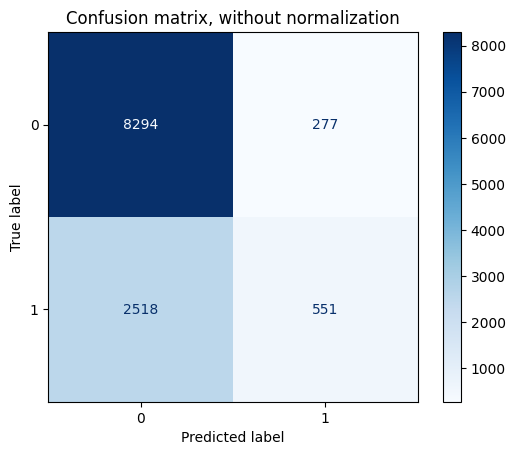

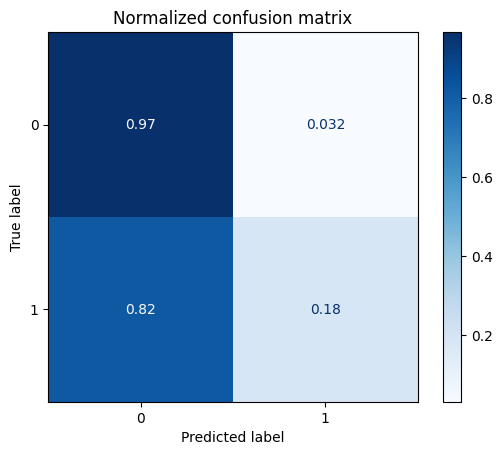

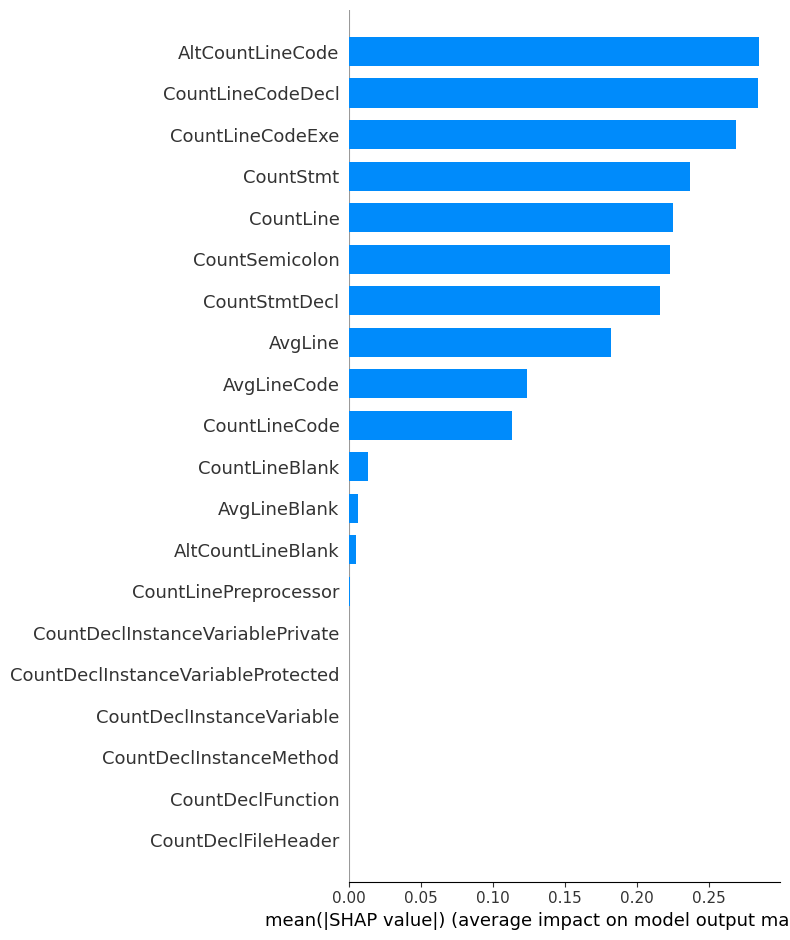

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


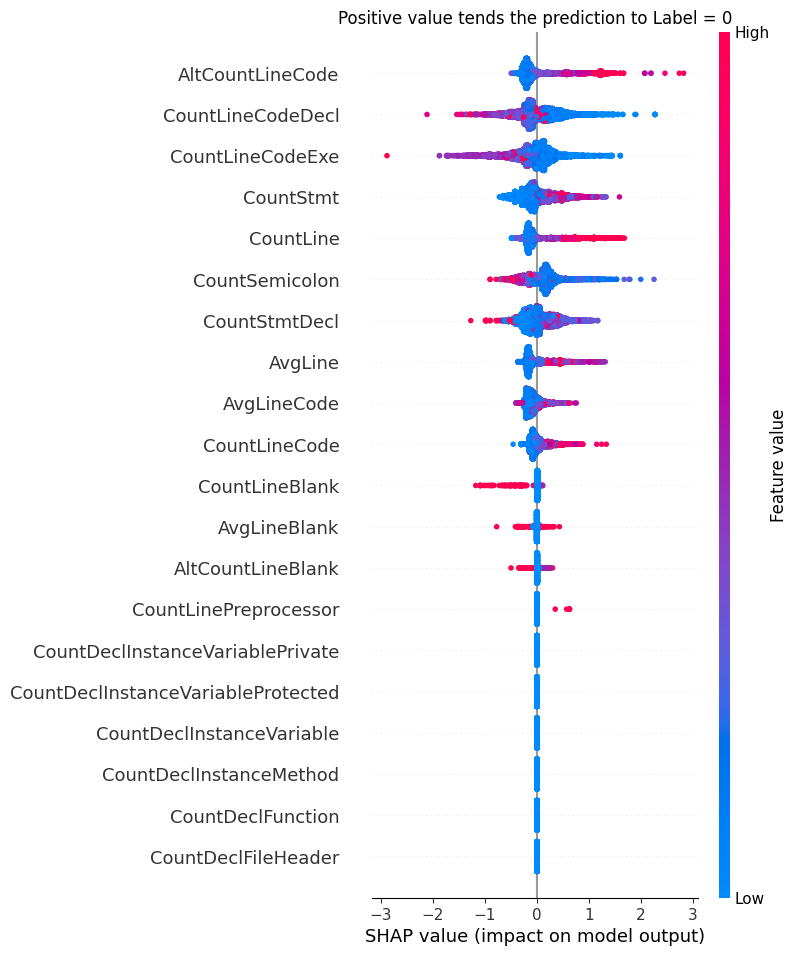

In [44]:
df = pd.read_csv('au_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':150, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot

shap_values_new = [-shap_values,shap_values]

shap.summary_plot(shap_values_new[0], X_test,show=False) #summary plot for Label=0 (No Vulnerability)
plt.title( "Positive value tends the prediction to Label = 0")
plt.show()


Size of Dataset (265985, 67)
Accuracy:89.499032 %



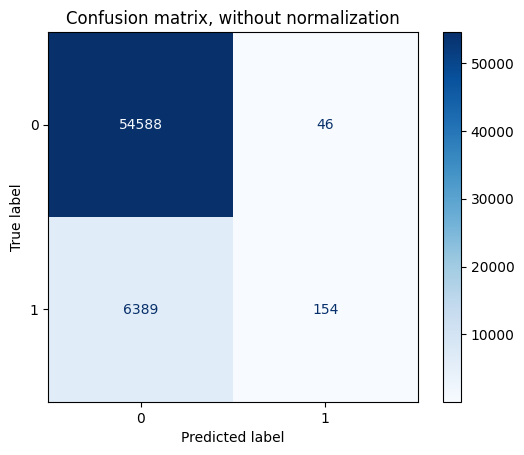

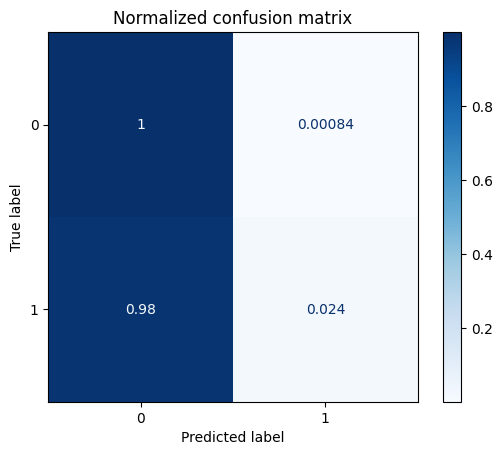

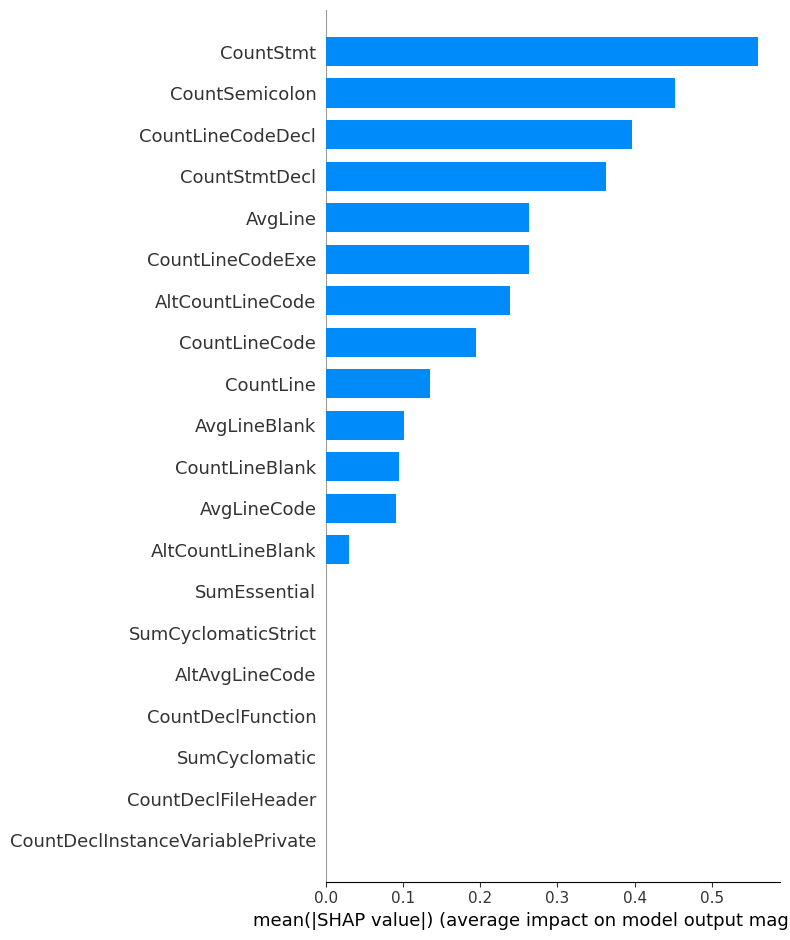

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


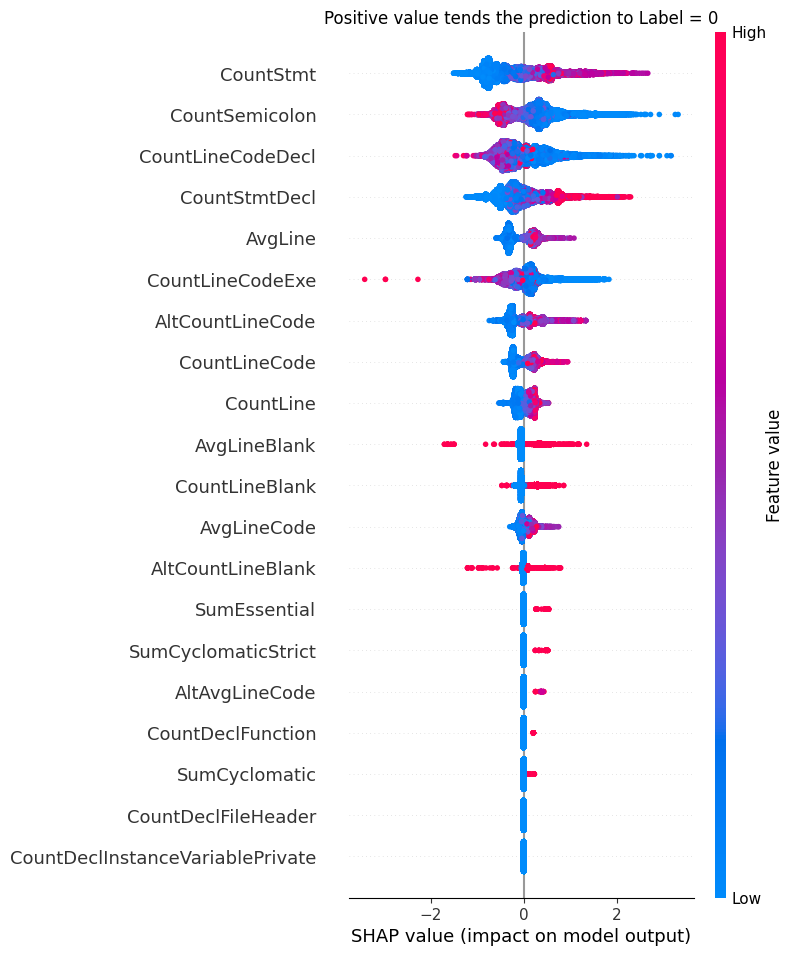

In [43]:
df = pd.read_csv('pu_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':1000, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot

shap_values_new = [-shap_values,shap_values]

shap.summary_plot(shap_values_new[0], X_test,show=False) #summary plot for Label=0 (No Vulnerability)
plt.title( "Positive value tends the prediction to Label = 0")
plt.show()


Size of Dataset (64403, 67)
Accuracy:78.834821 %



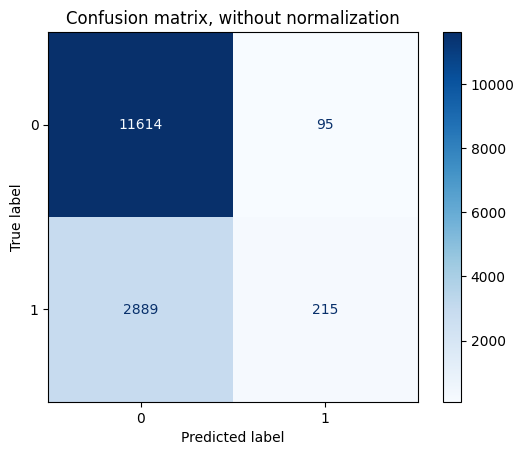

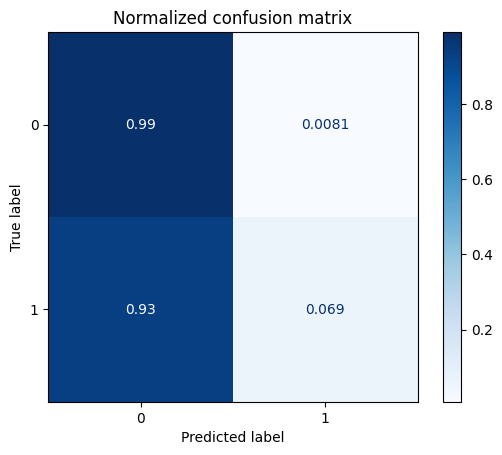

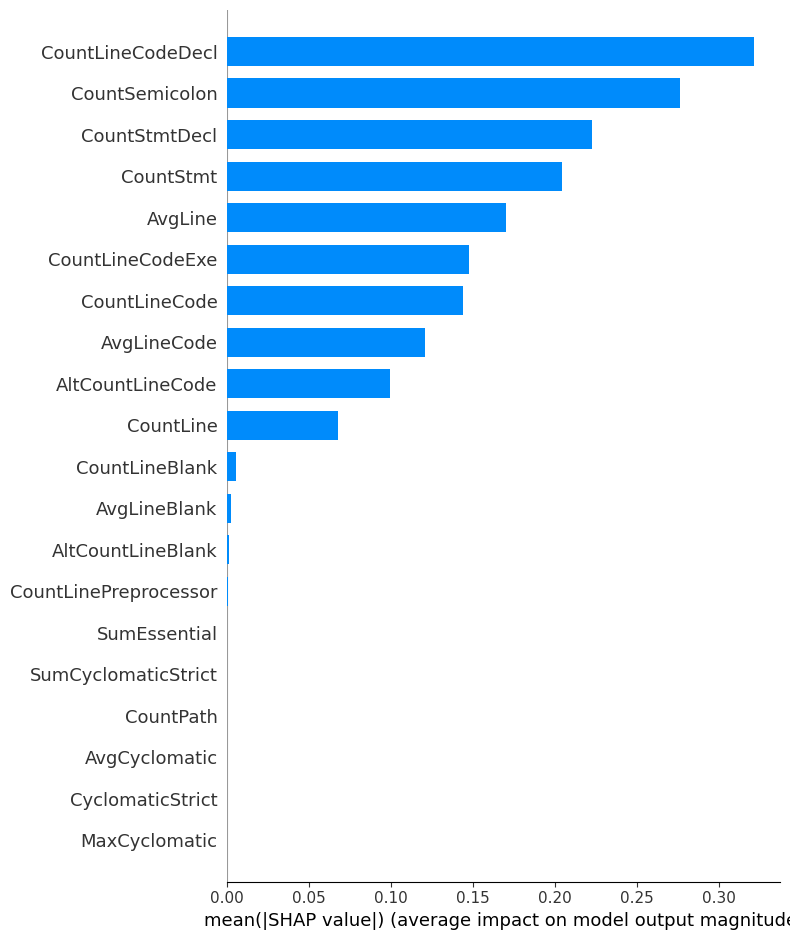

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


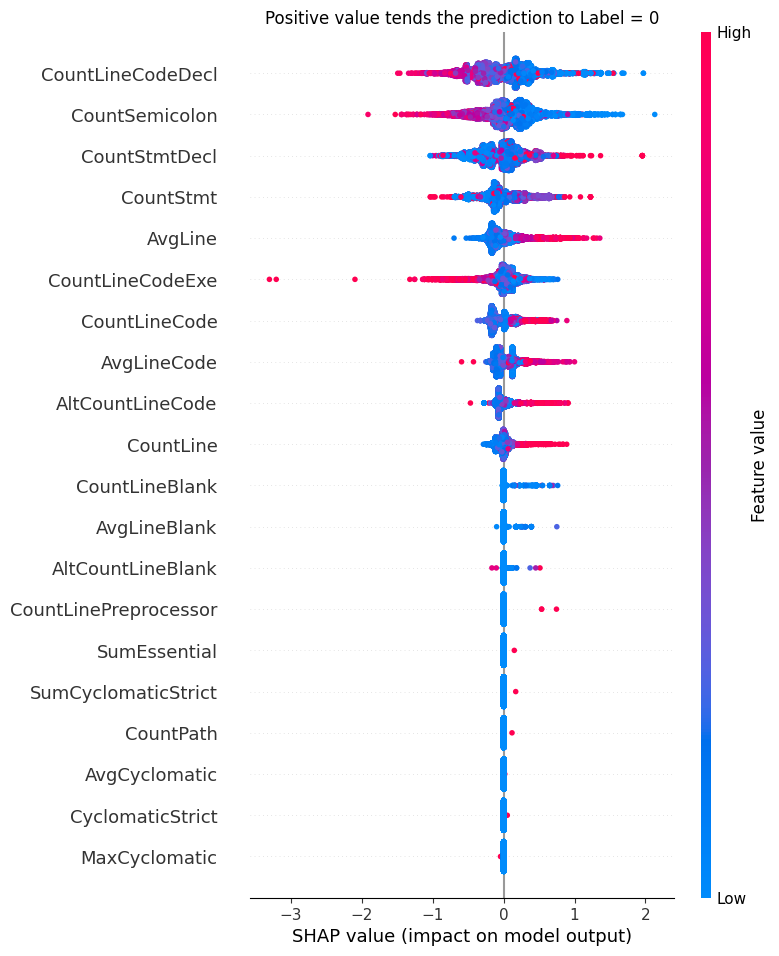

In [45]:
df = pd.read_csv('ae_metrics.csv')
df.drop(df.columns[[0,1]], inplace=True,axis =1)
nan_count = df.isna().sum().sum()

if nan_count:
  for column in df:
      df[column] = df[column].fillna(df[column].mean())

features = [feat for feat in list(df)  
              if feat != 'Label']
df['Label'] = df['Label'].astype(int)

print(f"Size of Dataset {df.shape}")

X_train, X_test, y_train, y_test = train_test_split(df[features], df[['Label']], test_size=0.23,random_state=1) 
params = {'iterations':150, 
            'learning_rate':0.15,
            'verbose':False, 
            'od_type':"Iter", # overfit detector 
            'od_wait':20, # most recent best iteration to wait before stopping
            'random_seed':1 
    }

cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train)

accuracies = cross_val_score(estimator = cat_model, X = df[features], y = df[['Label']], cv = 10)
print("Accuracy:{:.6f} %".format(accuracies.mean()*100))
print()

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        cat_model,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    
plt.show()

shap.initjs()
explainer = shap.TreeExplainer(cat_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test,plot_type='bar') #feature importances plot

shap_values_new = [-shap_values,shap_values]

shap.summary_plot(shap_values_new[0], X_test,show=False) #summary plot for Label=0 (No Vulnerability)
plt.title( "Positive value tends the prediction to Label = 0")
plt.show()
